In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [27]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

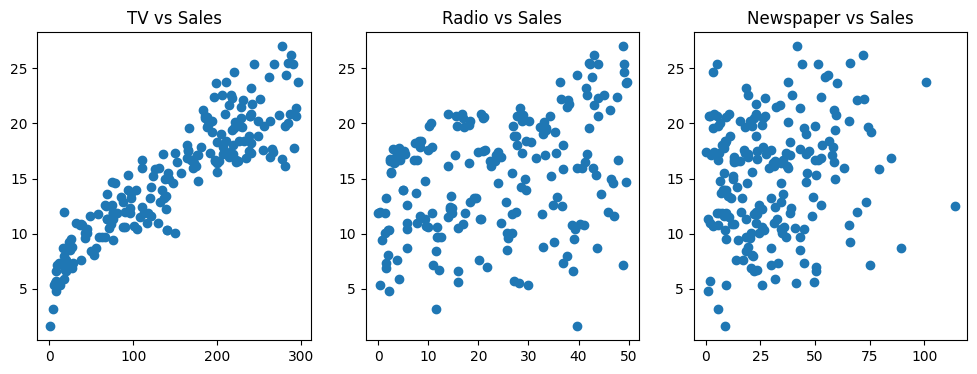

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

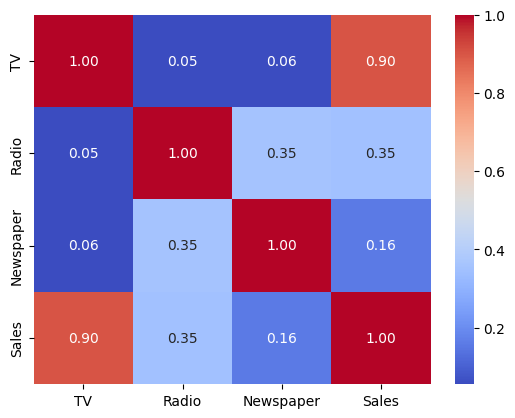

In [29]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

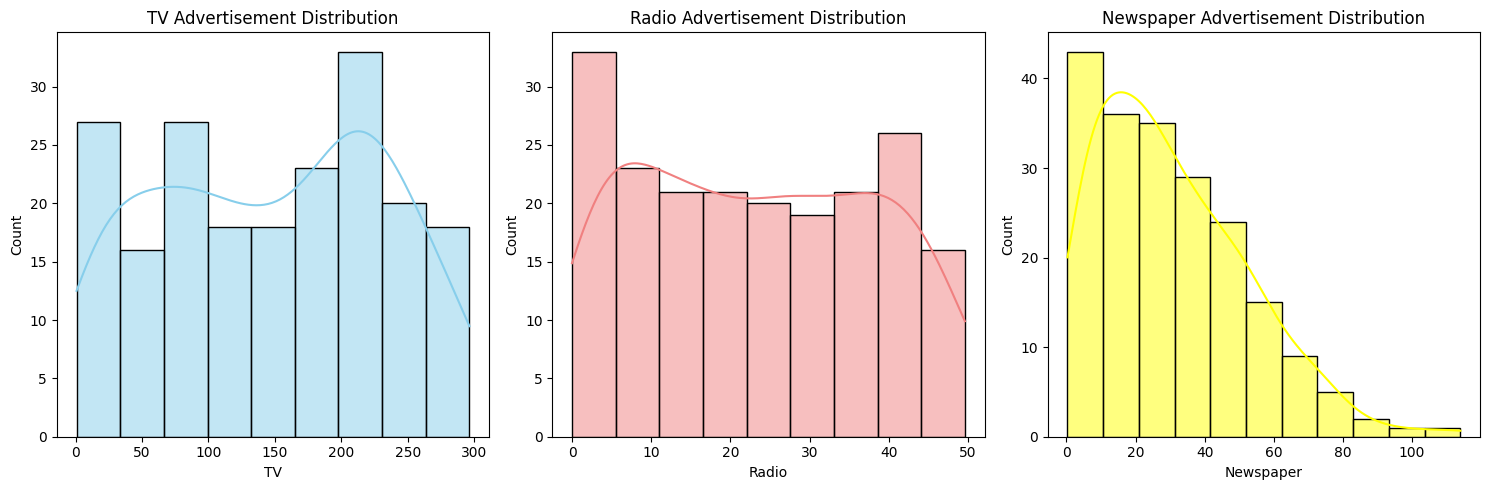

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='skyblue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='lightcoral')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

In [31]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [43]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [36]:
#Train a Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [37]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')


Random Forest Regression:
Mean Squared Error: 1.467098575000001
R-squared: 0.9525227718430735


In [39]:
#Train a Gradiant Boost Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [41]:
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("\nGradient Boosting Regression:")
print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')


Gradient Boosting Regression:
Mean Squared Error: 1.268846311243161
R-squared: 0.9589384743182877


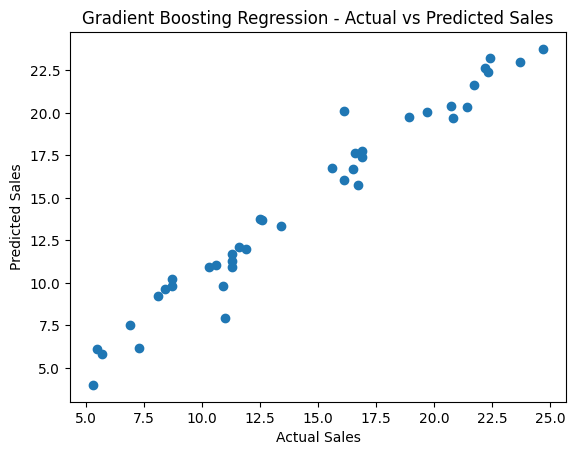

In [42]:
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boosting Regression - Actual vs Predicted Sales')
plt.show()